In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Topmentor/Position_Salaries.xlsx')
data.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [ ]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Salary,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
Position,0
Level,0
Salary,0


In [ ]:
data.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()

In [ ]:
data["Position"] = label.fit_transform(data["Position"])

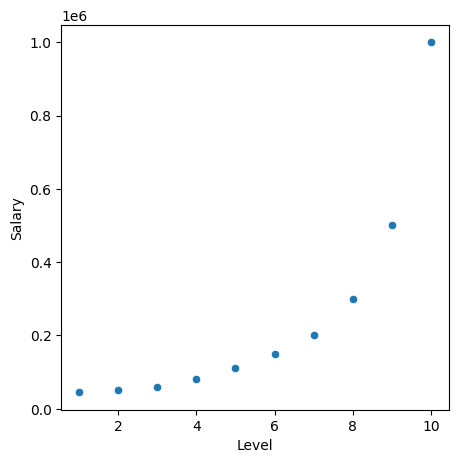

In [ ]:
plt.figure(figsize = (5,5))
sns.scatterplot(x= 'Level', y = 'Salary', data = data)
plt.show()


In [ ]:
X = data[['Position', "Level"]]
y = data['Salary']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
X = data['Level'].values.reshape(-1,1)
y = data['Salary'].values.reshape(-1,1)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
models = [('RandomForestRegressor', RandomForestRegressor())]
for name, model in models:
    print(name)
    print()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("r2 score", r2_score(y_test, y_pred))
    print("\n")
    print("mean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\n")
    print("mean squared error:", mean_squared_error(y_test, y_pred))
    print("\n")

RandomForestRegressor

r2 score 0.9858016492537314


mean absolute error: 18650.0


mean squared error: 528494166.6666667




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
